# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [112]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [113]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [114]:
#  1. Get the total rides for each city type

total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [115]:
# 2. Get the total drivers for each city type (pyber data inflated)
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [116]:
#  3. Get the total amount of fares for each city type
total_fares_per_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [117]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares_per_type / total_ride_count
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [118]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares_per_type / driver_count
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [119]:
#Set index to type
pyber_data_df.set_index("type")

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [120]:
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [121]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
         {"Total Rides": total_ride_count,
          "Total Drivers": driver_count,
          "Total Fares": total_fares_per_type,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver
          })
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [122]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [123]:
#  8. Format the columns.

pyber_summary_df = pd.DataFrame(
         {"Total Rides": total_ride_count,
          "Total Drivers": driver_count,
          "Total Fares": total_fares_per_type,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver
          })

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [124]:
# 1. Read the merged DataFrame
pyber_data_df.head()
pyber_data_df.index.name = None
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [125]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_of_fares.tail(10)

fare
type  date                      
Urban 2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

In [126]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares = sum_of_fares.reset_index()
sum_of_fares.tail(10)

,type,date,fare
2365,Urban,2019-05-07 17:27:48,6.39
2366,Urban,2019-05-07 20:05:15,24.20
2367,Urban,2019-05-07 20:22:19,18.74
2368,Urban,2019-05-08 01:54:18,32.69
2369,Urban,2019-05-08 02:31:25,41.33
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77
2374,Urban,2019-05-08 13:10:18,18.04


In [127]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_of_fares_pivot = sum_of_fares.pivot(index="date", columns="type", values="fare")
sum_of_fares_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [128]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_of_fares.loc["2019-01-01": "2019-04-29"]
sum_of_fares

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [129]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_of_fares_pivot.index = pd.to_datetime(sum_of_fares_pivot.index)
sum_of_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [130]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_of_fares_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [131]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_weekly_fares_df =sum_of_fares_pivot.resample("W").sum()
sum_of_weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


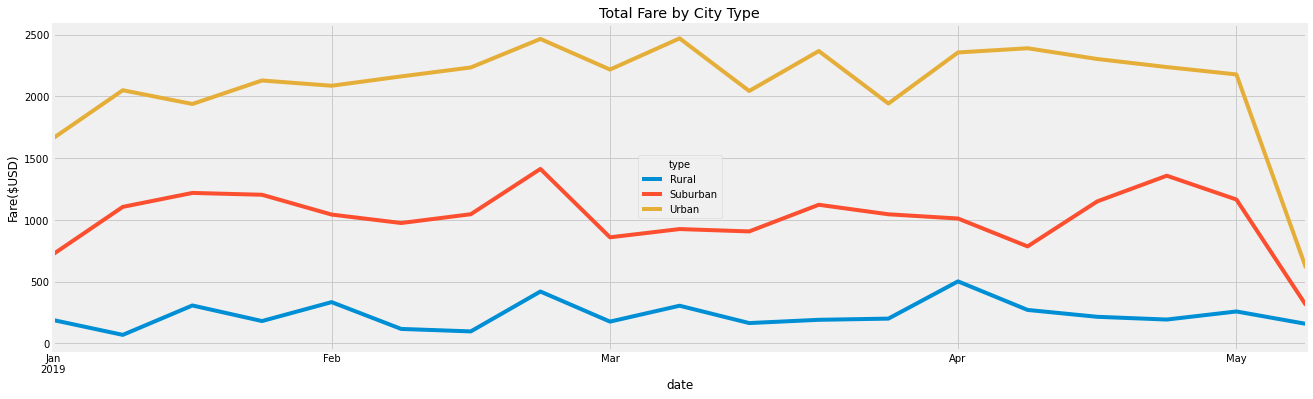

In [135]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.pyplot as plt
weekly_fares = sum_of_weekly_fares_df.plot(figsize = (20,6))
#Add title
weekly_fares.set_title("Total Fare by City Type")
# Add x and y axis labels
weekly_fares.set_ylabel("Fare($USD)")
from matplotlib import style

plt.show()
